In [1]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting

h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/675nm_no_IMR_offset_with_dichroic.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"


Chain shape: (10000, 62, 12) (nwalkers, nsteps, ndim)
None


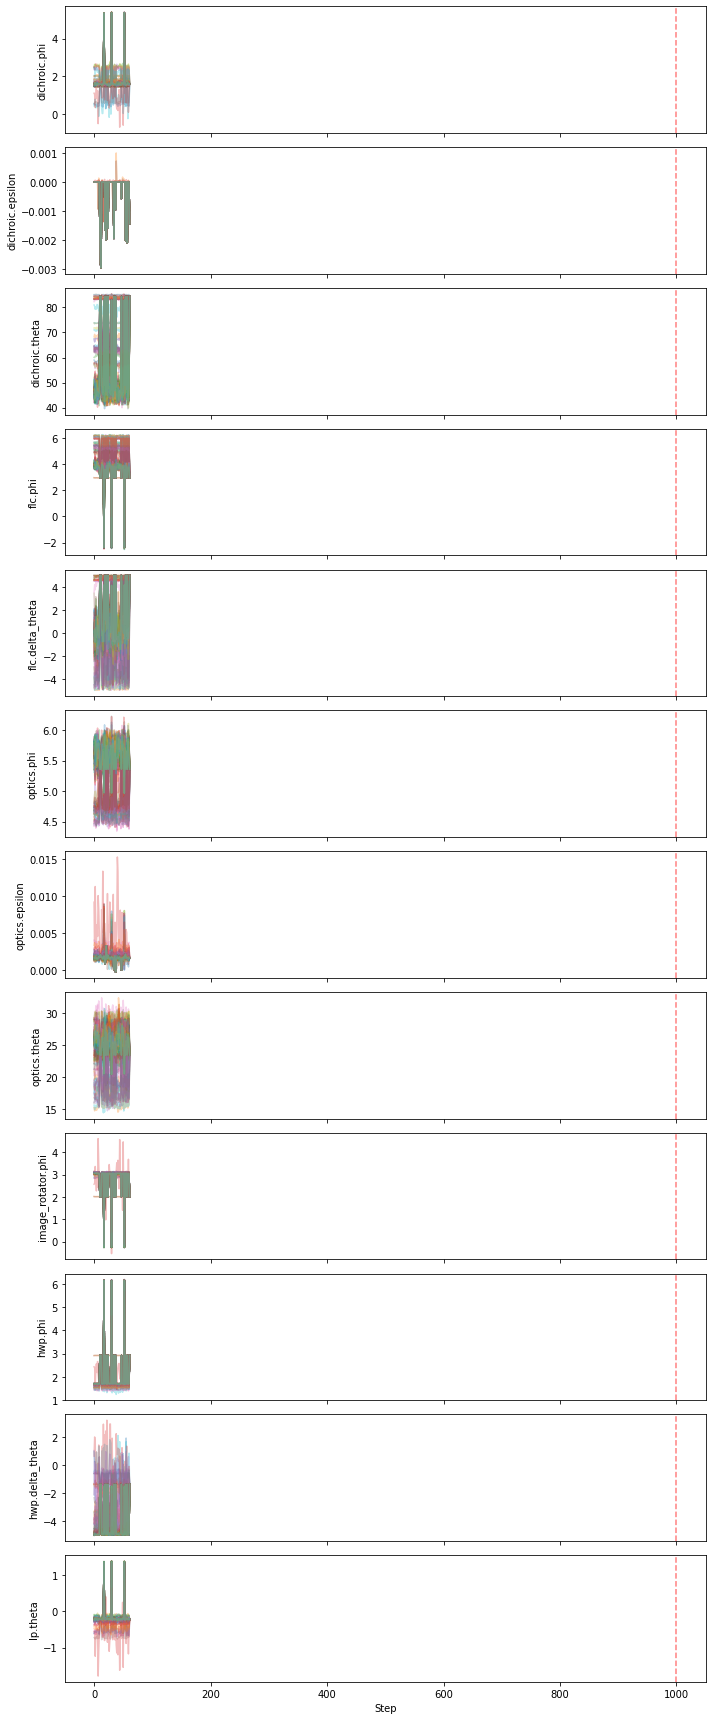

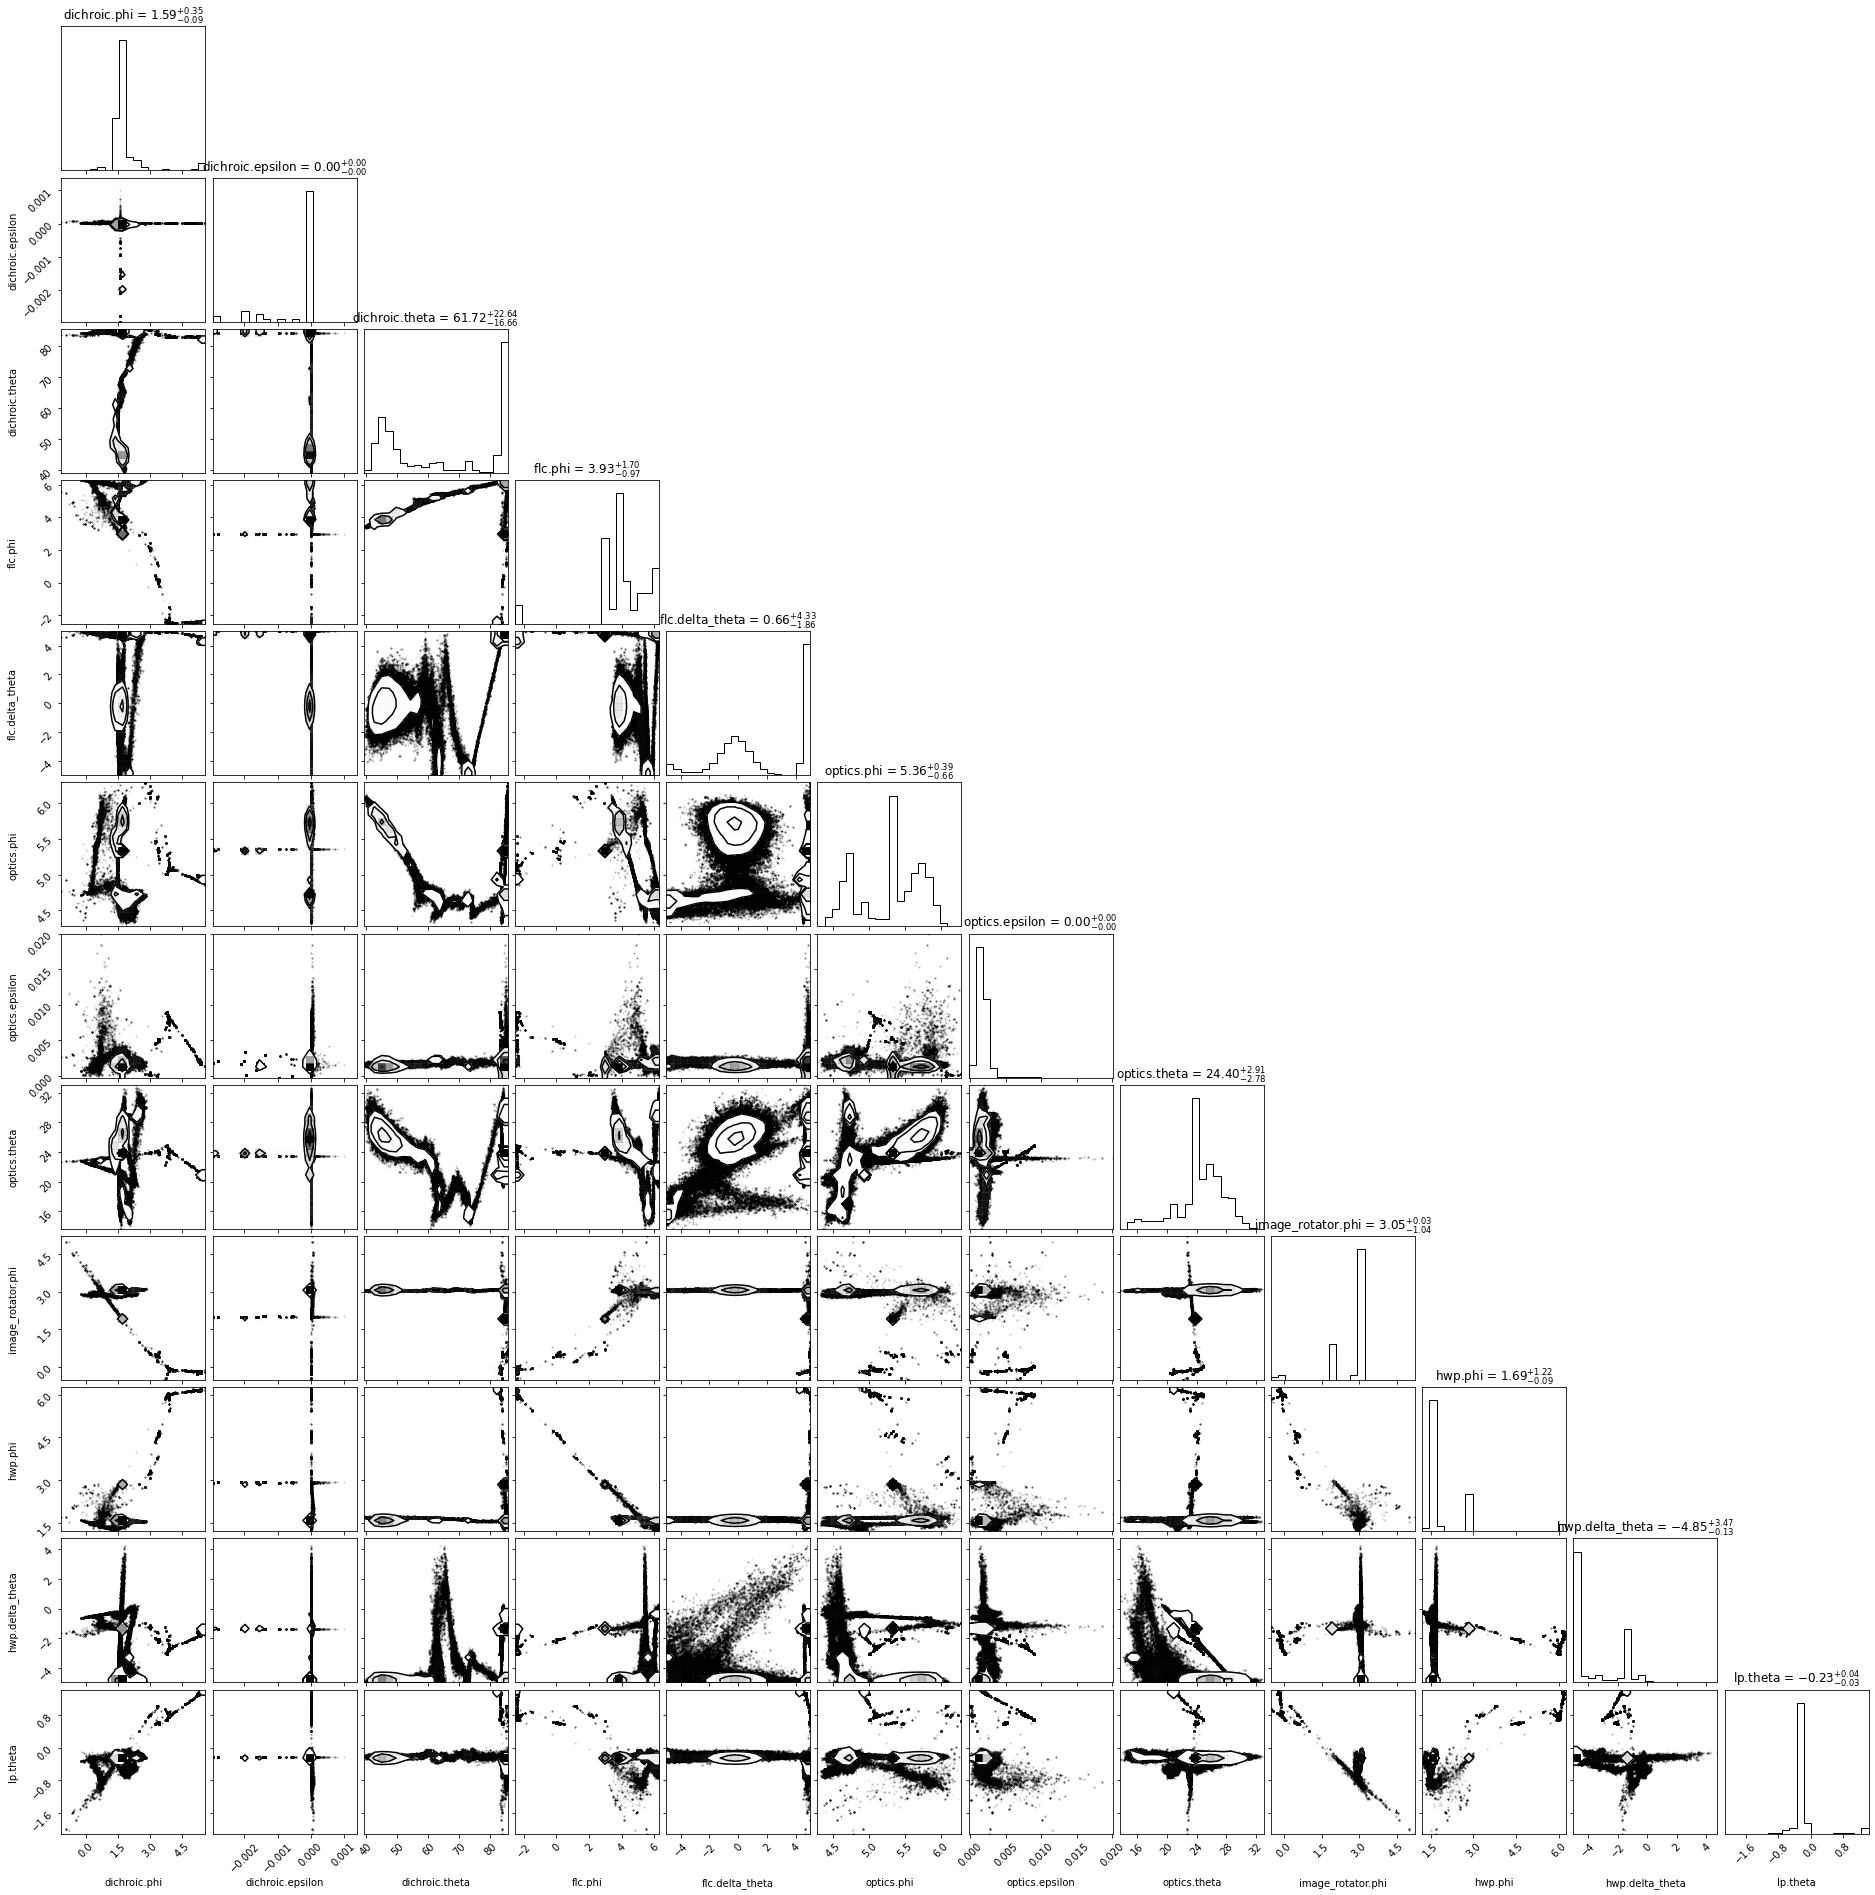

dichroic.phi: 1.59039 ± 0.78569
dichroic.epsilon: 0.00001 ± 0.00077
dichroic.theta: 61.72334 ± 17.49573
flc.phi: 3.93197 ± 1.71901
flc.delta_theta: 0.66321 ± 2.96455
optics.phi: 5.35761 ± 0.43998
optics.epsilon: 0.00169 ± 0.00089
optics.theta: 24.39573 ± 3.17835
image_rotator.phi: 3.04891 ± 0.76438
hwp.phi: 1.69382 ± 1.00583
hwp.delta_theta: -4.85023 ± 1.72844
lp.theta: -0.22577 ± 0.32951


In [2]:
chain, names = plotting.load_sampler_data(h5_file_path, txt_file_path)
print(plotting.inspect_h5_chain_shape(h5_file_path))
plotting.plot_mcmc_chains(h5_file_path, txt_file_path, burn_in=1000, n_walkers_to_plot=100)
plotting.plot_corner(h5_file_path, txt_file_path, burn_in = 10)
plotting.summarize_posteriors(h5_file_path, txt_file_path, burn_in = 10)


# Plotting Random Chains for Fitting 

In [3]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting
import numpy as np

system_dict = {
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta" : 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"

plotting.plot_mcmc_fits(
    h5_filename=h5_file_path,
    txt_filename=txt_file_path,
    csv_path=csv_file_path,
    filter_wavelength="675-50",
    system_dict=system_dict,
    wavelength_str="675nm",
    n_samples=50,
    burn_in=1000
)


ValueError: a must be greater than 0 unless no samples are taken